# Pricing Model

In [1]:
import pandas as pd
import numpy as np
import pack_utils
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pm_starter = pack_utils.make_pricing_model_starter(pack_utils.LIST_OF_CSVS)

In [3]:
pm_starter['Pack'].value_counts()

Advanced          104
Jumbo Supply      102
Reserves           99
Arsenal            80
Ammo Priming       64
Supply             61
Premium            55
Technical Mods     43
Expert             32
Name: Pack, dtype: int64

In [4]:
pm_starter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 2 to 618
Data columns (total 14 columns):
Pack               640 non-null object
Price              640 non-null float64
Common (C/W)       640 non-null float64
Uncommon (C/W)     640 non-null float64
Rare Mod           640 non-null float64
Rare Weap.         640 non-null float64
Rare Char.         640 non-null float64
UR Weap.           640 non-null float64
UR Char.           640 non-null float64
1 Level booster    640 non-null float64
2 Level booster    640 non-null float64
3 Level booster    640 non-null float64
4 Level booster    640 non-null float64
N. Consumbales     640 non-null float64
dtypes: float64(13), object(1)
memory usage: 75.0+ KB


## UR True Credits Cost

In [5]:
sp_df = pack_utils.get_support_packs_df(pm_starter)

In [6]:
sp_df['Pack'].value_counts()

Jumbo Supply    102
Ammo Priming     64
Supply           61
Name: Pack, dtype: int64

In [7]:
sp_df['Price'].value_counts()

10000.0    166
2000.0      61
Name: Price, dtype: int64

In [8]:
support_cost = np.sum(sp_df['Price'])
print(support_cost)

1782000.0


In [9]:
ur_df = pack_utils.get_ur_packs_df(pm_starter)

In [10]:
ur_df['Pack'].value_counts()

Reserves    99
Arsenal     80
Premium     55
Expert      32
Name: Pack, dtype: int64

In [11]:
ur_df['Price'].value_counts()

100000.0    234
50000.0      32
Name: Price, dtype: int64

In [12]:
ur_pack_cost = np.sum(ur_df['Price'])
print(ur_pack_cost)

25000000.0


In [13]:
n_ur_char, n_ur_weap = pack_utils.get_ur_counts(ur_df)
n_ur_tot = n_ur_weap + n_ur_char
print('Number of total URs =', n_ur_tot)

Number of total URs = 65.0


In [14]:
creds_per_ur = (ur_pack_cost + support_cost) / n_ur_tot
print(creds_per_ur)

412030.76923076925


## Boosters and Consumables Prices

### Global (over all packs)

In [15]:
bs_df = pm_starter.copy()
bs_df = bs_df.drop(columns=['Pack'])

Here, URs are confusing because their true value is not reflected in their appearance.

In [16]:
list(bs_df)

['Price',
 'Common (C/W)',
 'Uncommon (C/W)',
 'Rare Mod',
 'Rare Weap.',
 'Rare Char.',
 'UR Weap.',
 'UR Char.',
 '1 Level booster',
 '2 Level booster',
 '3 Level booster',
 '4 Level booster',
 'N. Consumbales']

In [17]:
bs_df['R/UR Weap.'] = bs_df['Rare Weap.'] + bs_df['UR Weap.']
bs_df['R/UR Char.'] = bs_df['Rare Char.'] + bs_df['UR Char.']

In [18]:
bs_df = bs_df.drop(columns=['Rare Weap.', 'Rare Char.', 'UR Weap.', 'UR Char.'])
print(list(bs_df))

['Price', 'Common (C/W)', 'Uncommon (C/W)', 'Rare Mod', '1 Level booster', '2 Level booster', '3 Level booster', '4 Level booster', 'N. Consumbales', 'R/UR Weap.', 'R/UR Char.']


In [19]:
bs_df['Price'].value_counts()

100000.0    234
10000.0     166
20000.0     147
2000.0       61
50000.0      32
Name: Price, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
bs_train, bs_test = train_test_split(bs_df, test_size=0.1, random_state=42)

In [22]:
print(bs_train['Price'].value_counts())
print(len(bs_train))

100000.0    208
10000.0     152
20000.0     131
2000.0       57
50000.0      28
Name: Price, dtype: int64
576


In [23]:
print(bs_test['Price'].value_counts())
print(len(bs_test))

100000.0    26
20000.0     16
10000.0     14
50000.0      4
2000.0       4
Name: Price, dtype: int64
64


In [24]:
bs_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 547 to 97
Data columns (total 11 columns):
Price              64 non-null float64
Common (C/W)       64 non-null float64
Uncommon (C/W)     64 non-null float64
Rare Mod           64 non-null float64
1 Level booster    64 non-null float64
2 Level booster    64 non-null float64
3 Level booster    64 non-null float64
4 Level booster    64 non-null float64
N. Consumbales     64 non-null float64
R/UR Weap.         64 non-null float64
R/UR Char.         64 non-null float64
dtypes: float64(11)
memory usage: 6.0 KB


In [25]:
bs_target_train = bs_train['Price']
bs_target_test = bs_test['Price']
bs_train.drop(columns='Price', inplace=True)
bs_test.drop(columns='Price', inplace=True)

/Users/perdue/miniconda3/envs/py3a/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [26]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [27]:
support_vector_regressor = SVR(kernel='linear')
support_vector_regressor.fit(bs_train, bs_target_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
test_set_predictions = support_vector_regressor.predict(bs_test)
lin_mse = mean_squared_error(test_set_predictions, bs_target_test)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

50787.60301165205


In [29]:
list(zip(test_set_predictions[:10], bs_target_test[:10]))

[(22012.518079096044, 100000.0),
 (21318.22994350282, 100000.0),
 (21058.388135593217, 100000.0),
 (21619.6593220339, 100000.0),
 (20364.958757062144, 20000.0),
 (10000.099999999999, 10000.0),
 (20364.958757062144, 20000.0),
 (20695.947457627117, 20000.0),
 (10000.099999999999, 10000.0),
 (21058.388135593217, 100000.0)]

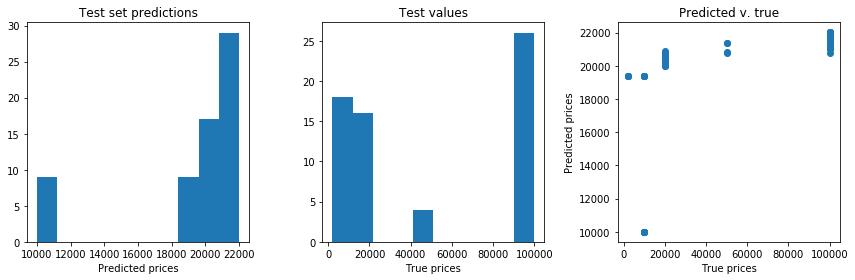

In [30]:
fig = plt.figure(figsize=(12,4))
gs = plt.GridSpec(1, 3)

ax = plt.subplot(gs[0])
n, bins, patches = plt.hist(test_set_predictions)
plt.title('Test set predictions')
plt.xlabel('Predicted prices')

ax = plt.subplot(gs[1])
n, bins, patches = plt.hist(bs_target_test)
plt.title('Test values')
plt.xlabel('True prices')

ax = plt.subplot(gs[2])
plt.scatter(bs_target_test, test_set_predictions)
plt.xlabel('True prices')
plt.ylabel('Predicted prices')
plt.title('Predicted v. true')

plt.tight_layout()

The SVR does a terrible job with high-priced packs...

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(bs_train, bs_target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
test_set_predictions = lin_reg.predict(bs_test)
lin_mse = mean_squared_error(test_set_predictions, bs_target_test)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

7095.320530317366


In [34]:
list(zip(test_set_predictions[:10], bs_target_test[:10]))

[(100711.0185177703, 100000.0),
 (97458.56460337553, 100000.0),
 (92208.65743978684, 100000.0),
 (96122.06602108809, 100000.0),
 (15700.30947796754, 20000.0),
 (9942.959383222627, 10000.0),
 (15700.30947796754, 20000.0),
 (20973.958950023018, 20000.0),
 (9942.959383222627, 10000.0),
 (92208.65743978684, 100000.0)]

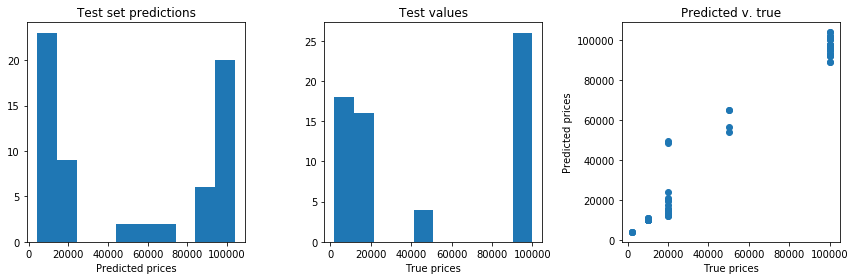

In [35]:
fig = plt.figure(figsize=(12,4))
gs = plt.GridSpec(1, 3)

ax = plt.subplot(gs[0])
n, bins, patches = plt.hist(test_set_predictions)
plt.title('Test set predictions')
plt.xlabel('Predicted prices')

ax = plt.subplot(gs[1])
n, bins, patches = plt.hist(bs_target_test)
plt.title('Test values')
plt.xlabel('True prices')

ax = plt.subplot(gs[2])
plt.scatter(bs_target_test, test_set_predictions)
plt.xlabel('True prices')
plt.ylabel('Predicted prices')
plt.title('Predicted v. true')

plt.tight_layout()

In [36]:
for x in zip(list(bs_train), lin_reg.coef_):
    print(x)

('Common (C/W)', 2943.38340895496)
('Uncommon (C/W)', 8318.535186278086)
('Rare Mod', 7985.740174325724)
('1 Level booster', 1059.4027411490222)
('2 Level booster', 444.8989625089199)
('3 Level booster', 4008.848518336437)
('4 Level booster', 5033.851459191133)
('N. Consumbales', 95.43993703519004)
('R/UR Weap.', 44417.865833216914)
('R/UR Char.', 41444.67774756271)
